#Import Libraries

In [ ]:
# importing libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pickle
from scipy import stats

import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

RANDOM_SEED = 7

In [ ]:
# reading raw data file
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
har_df = pd.read_csv('/content/drive/MyDrive/DeepLearning/RNN.LSTM.GRU/WISDM_ar_v1.1_raw.txt', header = None, names = columns)

# removing null values
har_df = har_df.dropna()
har_df.shape

# transforming the z-axis to float
har_df['z-axis'] = har_df['z-axis'].str.replace(';', '')
har_df['z-axis'] = har_df['z-axis'].apply(lambda x:float(x))

# drop the rows where timestamp is 0
df = har_df[har_df['timestamp'] != 0]

# now arrange data in ascending order of the user and timestamp
df = df.sort_values(by = ['user', 'timestamp'], ignore_index=True)

In [ ]:
df

,user,activity,timestamp,x-axis,y-axis,z-axis
0,1,Walking,4991922345000,0.69,10.80,-2.030000
1,1,Walking,4991972333000,6.85,7.44,-0.500000
2,1,Walking,4992022351000,0.93,5.63,-0.500000
3,1,Walking,4992072339000,-2.11,5.01,-0.690000
4,1,Walking,4992122358000,-4.59,4.29,-1.950000
...,...,...,...,...,...,...
1085355,36,Standing,15049012250000,-0.91,9.43,2.533385
1085356,36,Standing,15049062268000,-1.18,9.51,2.492524
1085357,36,Standing,15049112287000,-1.50,9.53,2.533385
1085358,36,Standing,15049162275000,-2.07,8.77,2.179256


In [ ]:
df.isnull().sum()

user         0
activity     0
timestamp    0
x-axis       0
y-axis       0
z-axis       0
dtype: int64

#Exploratory Data Analysis

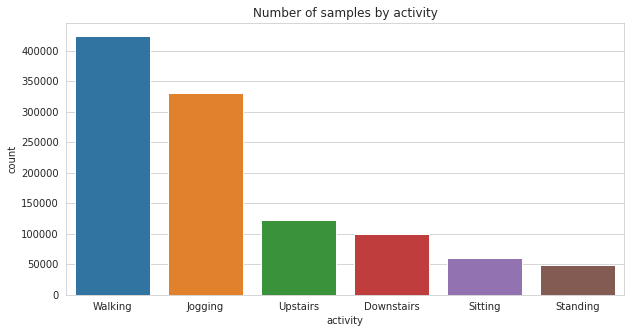

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 5))
sns.countplot(x = 'activity', data = df)
plt.title('Number of samples by activity')
plt.show()

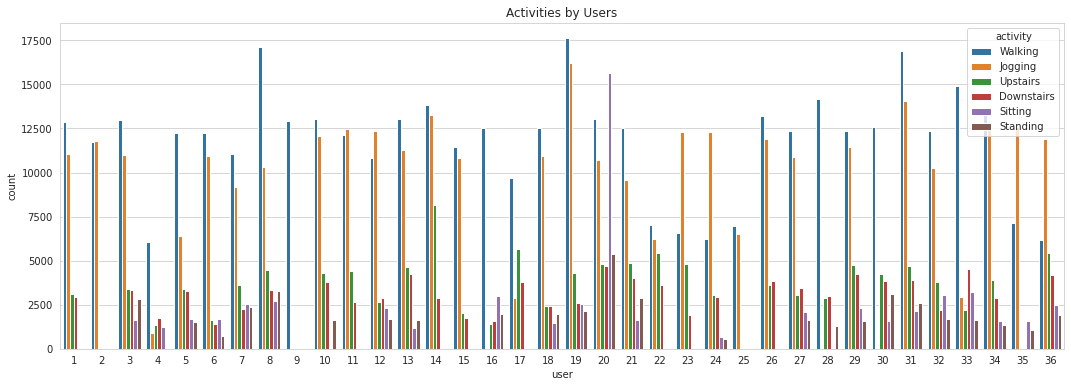

In [ ]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'user', hue = 'activity', data = df)
plt.title('Activities by Users')
plt.show()

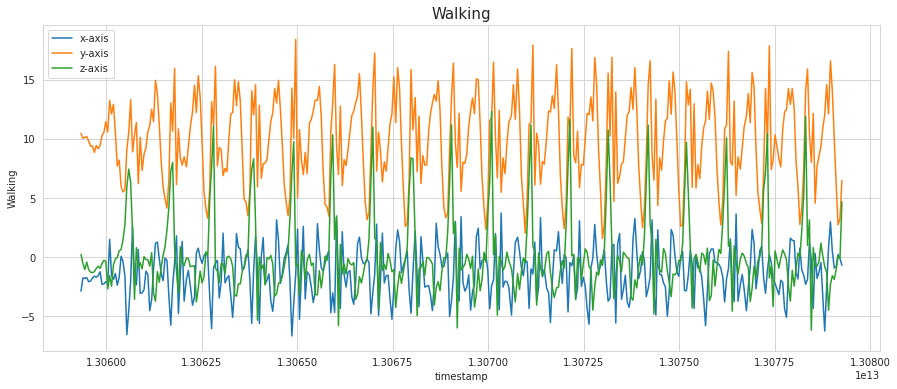

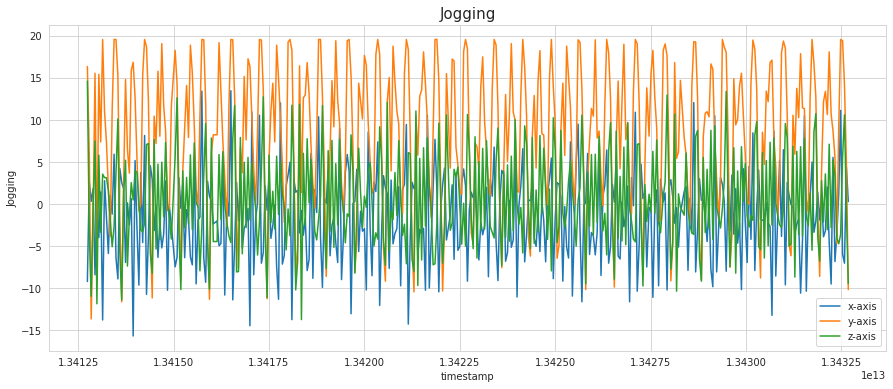

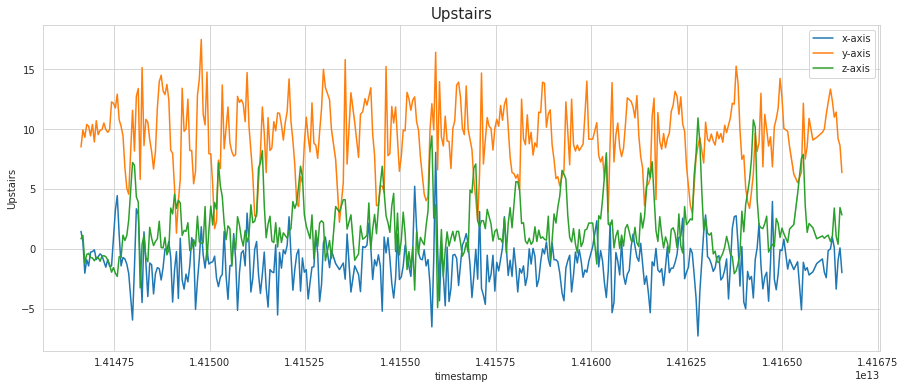

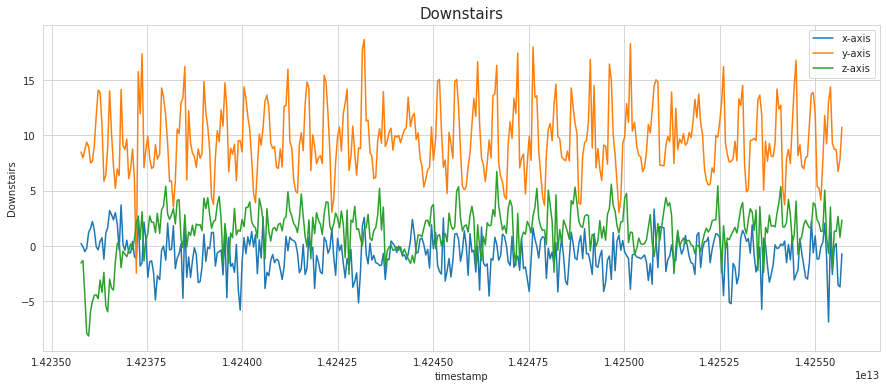

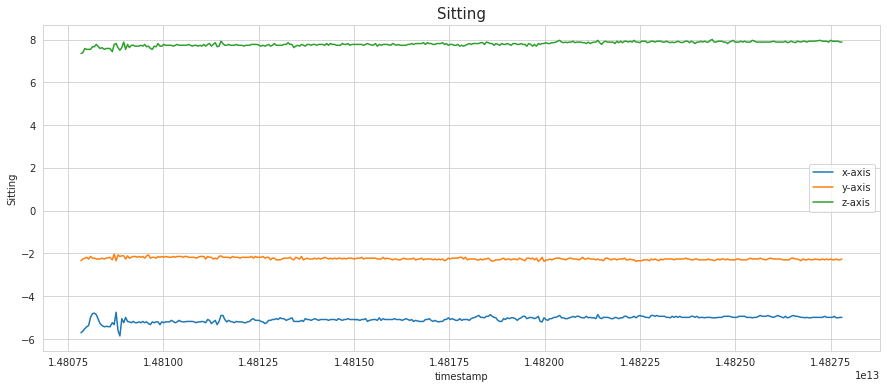

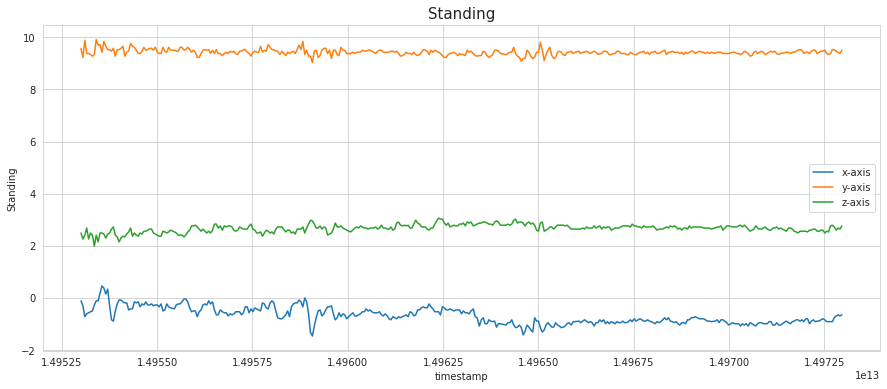

In [ ]:
for i in ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']:
   data_36 = df[(df['user'] == 36) & (df['activity'] == i)][:400]
   plt.figure(figsize = (15, 6))
   sns.lineplot(y = 'x-axis', x = 'timestamp', data = data_36)
   sns.lineplot(y = 'y-axis', x = 'timestamp', data = data_36)
   sns.lineplot(y = 'z-axis', x = 'timestamp', data = data_36)
   plt.legend(['x-axis', 'y-axis', 'z-axis'])
   plt.ylabel(i)
   plt.title(i, fontsize = 15)
   plt.show()

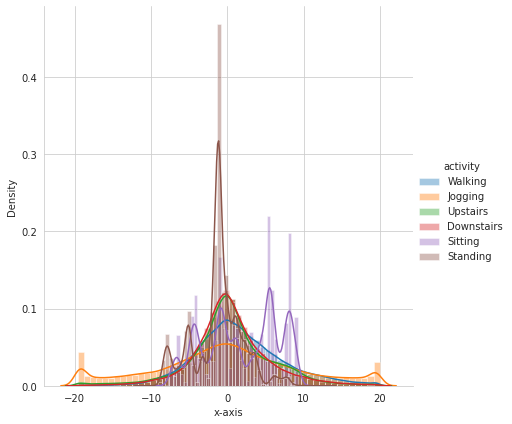

In [ ]:
sns.FacetGrid(df, hue = 'activity', size = 6).map(sns.distplot, 'x-axis').add_legend()

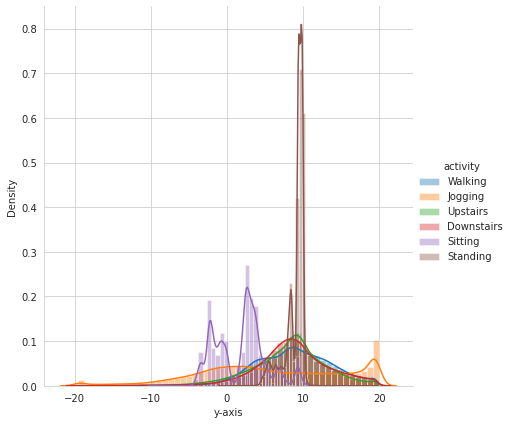

In [ ]:
sns.FacetGrid(df, hue = 'activity', size = 6).map(sns.distplot, 'y-axis').add_legend()

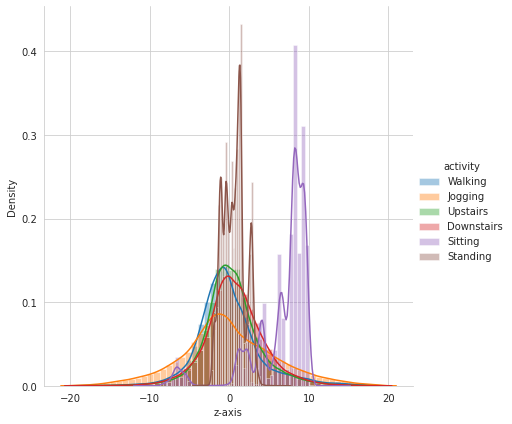

In [ ]:
sns.FacetGrid(df, hue = 'activity', size = 6).map(sns.distplot, 'z-axis').add_legend()

#Train Test Raw

In [ ]:
# # train data -> Users upto User ID = 25 (i.e. 25 users)
df_train = df[df['user'] <= 25]

# # test data -> Users from User ID = 25 to 32 (i.e. 5 users)
df_val = df[(df['user'] > 25) & (df['user'] <= 32)]

# # test data -> Users from User ID = 32 to 36 (i.e. 4 users)
df_test = df[df['user'] > 32]

In [ ]:
print(len(df_train) , len(df_val), len(df_test))

738323 227135 119902


In [ ]:
df_train.columns

Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')

In [ ]:
X_train = df_train.iloc[ : , -3:]
y_train = df_train['activity']

X_val = df_val.iloc[ : , -3:]
y_val = df_val['activity']

X_test = df_test.iloc[ : , -3:]
y_test = df_test['activity']

In [ ]:
y_test

965458     Standing
965459     Standing
965460     Standing
965461     Standing
965462     Standing
             ...   
1085355    Standing
1085356    Standing
1085357    Standing
1085358    Standing
1085359    Standing
Name: activity, Length: 119902, dtype: object

In [ ]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_val_data_lr = scaler.transform(X_val)
# logistic regression model

lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, y_train)
y_val_pred = lr.predict(X_val_data_lr)
print('Accuracy:', accuracy_score(y_val, y_val_pred))
print('\n -------------Classification Report-------------\n')
print(classification_report(y_val, y_val_pred, digits=4))

Accuracy: 0.4641336650009906

 -------------Classification Report-------------

              precision    recall  f1-score   support

  Downstairs     0.0000    0.0000    0.0000     24513
     Jogging     0.4645    0.4914    0.4776     58551
     Sitting     0.3299    0.1921    0.2428     11184
    Standing     0.0000    0.0000    0.0000     11913
    Upstairs     0.0000    0.0000    0.0000     27045
     Walking     0.4695    0.7932    0.5898     93929

    accuracy                         0.4641    227135
   macro avg     0.2106    0.2461    0.2184    227135
weighted avg     0.3301    0.4641    0.3790    227135



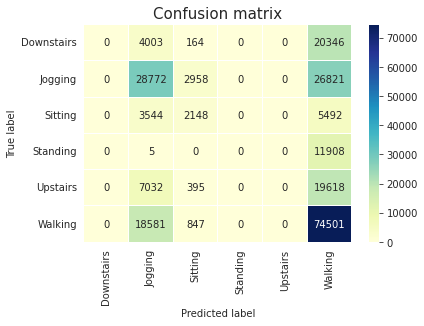

In [ ]:
labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(confusion_matrix_val, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
X_test_data_lr = scaler.transform(X_test)

y_test_pred = lr.predict(X_test_data_lr)
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('\n -------------Classification Report-------------\n')
print(classification_report(y_test, y_test_pred, digits=4))

Accuracy: 0.44307017397541326

 -------------Classification Report-------------

              precision    recall  f1-score   support

  Downstairs     0.0000    0.0000    0.0000     11558
     Jogging     0.5807    0.3254    0.4171     40266
     Sitting     0.9103    0.4561    0.6077      8922
    Standing     0.0000    0.0000    0.0000      5955
    Upstairs     0.0000    0.0000    0.0000     11564
     Walking     0.3871    0.8635    0.5346     41637

    accuracy                         0.4431    119902
   macro avg     0.3130    0.2742    0.2599    119902
weighted avg     0.3972    0.4431    0.3709    119902



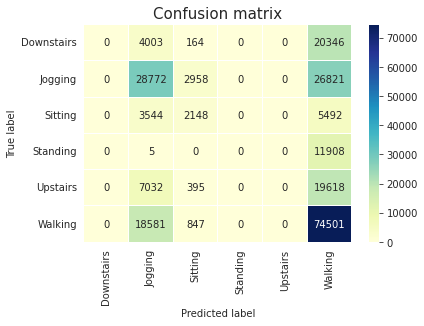

In [ ]:
labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Feature Engineering**

In [ ]:
# # train data -> Users upto User ID = 25 (i.e. 25 users)
df_train = df[df['user'] <= 25]

# # test data -> Users from User ID = 25 to 32 (i.e. 5 users)
df_val = df[(df['user'] > 25) & (df['user'] <= 32)]

# # test data -> Users from User ID = 32 to 36 (i.e. 4 users)
df_test = df[df['user'] > 32]

In [ ]:
x_list = []
y_list = []
z_list = []
train_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df_train.shape[0] - window_size, step_size):
    xs = df_train['x-axis'].values[i: i + 100]
    ys = df_train['y-axis'].values[i: i + 100]
    zs = df_train['z-axis'].values[i: i + 100]
    label = stats.mode(df_train['activity'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_train = pd.DataFrame()

# mean
X_train['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_train['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_train['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_train['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_train['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_train['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_train['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_train['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_train['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_train['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_train['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_train['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_train['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_train['x_maxmin_diff'] = X_train['x_max'] - X_train['x_min']
X_train['y_maxmin_diff'] = X_train['y_max'] - X_train['y_min']
X_train['z_maxmin_diff'] = X_train['z_max'] - X_train['z_min']

# median
X_train['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_train['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_train['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_train['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_train['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_train['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_train['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_train['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_train['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_train['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_train['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_train['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_train['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_train['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_train['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_train['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_train['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_train['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_train['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_train['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_train['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# FFT mean
X_train['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_train['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_train['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_train['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_train['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_train['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_train['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_train['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_train['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_train['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_train['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_train['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_train['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_train['x_maxmin_diff_fft'] = X_train['x_max_fft'] - X_train['x_min_fft']
X_train['y_maxmin_diff_fft'] = X_train['y_max_fft'] - X_train['y_min_fft']
X_train['z_maxmin_diff_fft'] = X_train['z_max_fft'] - X_train['z_min_fft']

# FFT median
X_train['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_train['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_train['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_train['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_train['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_train['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_train['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_train['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_train['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_train['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_train['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_train['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_train['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
X_train['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_train['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [ ]:
X_train

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,3.6538,9.8101,-0.4788,5.508084,3.914714,3.201477,4.200456,3.173296,2.261984,-7.35,...,2.876810,1.942716,5.902973,9.730612,3.525171,3044.696352,1543.929460,1027.602156,59.792196,95.725493
1,3.8267,10.0261,-0.6779,5.543900,4.265195,3.200549,4.245502,3.438856,2.196162,-9.58,...,2.424683,1.039303,2.230341,5.947909,0.596694,3083.677660,1826.844868,1030.777484,62.224694,101.279099
2,3.8955,10.0714,-0.6730,5.942122,4.408135,3.365199,4.611740,3.497088,2.345800,-9.58,...,2.136491,1.238485,1.333222,5.573774,1.710798,3532.300356,1943.213404,1163.838904,67.411176,107.454842
3,4.0975,10.0045,-0.4714,5.787474,4.372943,3.437675,4.400350,3.444650,2.444004,-8.24,...,2.452121,1.667444,1.753765,8.225041,3.616595,3349.909876,1915.293756,1204.323104,65.586009,105.678013
4,3.8653,9.9209,-0.5538,5.843144,4.713848,3.454630,4.424276,3.842882,2.513868,-8.96,...,2.745149,2.484931,0.704434,11.172352,8.054639,3415.034116,2222.040340,1197.731656,66.609368,106.819424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14760,2.2590,10.1281,0.1808,5.785310,4.433256,5.166497,4.658580,3.525710,3.912576,-11.73,...,2.672042,2.228233,3.594931,7.847685,4.768051,3409.360104,2057.171100,2681.928700,63.730449,102.587810
14761,2.2369,9.9617,-0.0278,5.581357,4.213513,5.185932,4.581024,3.284504,4.058528,-10.38,...,3.115898,2.154471,6.153977,11.026097,5.409497,3128.122140,1802.941812,2696.305816,66.138430,107.037197
14762,2.1708,9.9805,-0.0602,6.021614,4.383660,5.030539,4.834920,3.458980,3.967160,-11.41,...,3.173634,1.668962,5.659760,11.531584,2.972062,3713.032836,1924.963916,2545.593620,68.404233,110.217277
14763,2.1479,10.0473,0.0180,6.257565,4.659413,5.073313,4.932142,3.748068,3.661120,-11.41,...,2.673535,1.564227,4.252963,8.901566,2.458701,3922.057820,2187.488652,2604.542400,74.321859,120.962767


In [ ]:
train_labels

['Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Walking',
 'Wa

In [ ]:
x_list = []
y_list = []
z_list = []
val_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df_val.shape[0] - window_size, step_size):
    xs = df_val['x-axis'].values[i: i + 100]
    ys = df_val['y-axis'].values[i: i + 100]
    zs = df_val['z-axis'].values[i: i + 100]
    label = stats.mode(df_val['activity'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    val_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_val = pd.DataFrame()

# mean
X_val['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_val['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_val['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_val['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_val['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_val['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_val['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_val['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_val['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_val['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_val['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_val['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_val['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_val['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_val['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_val['x_maxmin_diff'] = X_val['x_max'] - X_val['x_min']
X_val['y_maxmin_diff'] = X_val['y_max'] - X_val['y_min']
X_val['z_maxmin_diff'] = X_val['z_max'] - X_val['z_min']

# median
X_val['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_val['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_val['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_val['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_val['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_val['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_val['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_val['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_val['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_val['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_val['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_val['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_val['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_val['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_val['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_val['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_val['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_val['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_val['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_val['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_val['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_val['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_val['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_val['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_val['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_val['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_val['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_val['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_val['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_val['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_val['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_val['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))

# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_val['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_val['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_val['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_val['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_val['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_val['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_val['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_val['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_val['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_val['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_val['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_val['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_val['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_val['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_val['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_val['x_maxmin_diff_fft'] = X_val['x_max_fft'] - X_val['x_min_fft']
X_val['y_maxmin_diff_fft'] = X_val['y_max_fft'] - X_val['y_min_fft']
X_val['z_maxmin_diff_fft'] = X_val['z_max_fft'] - X_val['z_min_fft']

# FFT median
X_val['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_val['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_val['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_val['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_val['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_val['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_val['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_val['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_val['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_val['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_val['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_val['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_val['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_val['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_val['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_val['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_val['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_val['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_val['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_val['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_val['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_val['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
X_val['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
X_val['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_val['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_val['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [ ]:
X_val

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,5.9870,8.3557,-1.908300,5.322071,3.978400,3.060209,4.344140,3.125470,2.133206,-5.67,...,0.896916,0.846965,0.531652,-0.014959,1.051733,2833.606384,1582.777260,937.753236,64.341936,101.470857
1,5.9781,8.3449,-2.206300,5.600581,4.091100,2.954381,4.689490,3.203088,2.110944,-5.67,...,1.696005,0.925454,5.628877,2.943249,0.207800,3150.200700,1676.383324,872.980572,63.257530,99.707960
2,6.3160,8.3920,-2.105400,5.574379,4.036176,2.889120,4.628200,3.172160,2.130644,-4.56,...,2.007372,0.735281,6.278992,3.893594,-0.375345,3107.383924,1633.498816,835.396840,60.767018,93.396688
3,5.9805,8.4073,-1.942400,5.542949,4.199501,3.354784,4.555470,3.285160,2.415720,-4.86,...,1.627030,1.485374,7.136076,2.619118,2.836809,3075.389716,1763.696092,1129.299224,64.289855,100.949461
4,6.0811,8.5299,-1.836700,5.449387,4.260133,3.778642,4.409144,3.350084,2.763158,-4.86,...,2.039323,1.585765,4.818781,4.903007,2.834175,2973.052348,1817.072788,1428.181660,66.621330,105.046101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,-1.7913,9.8429,-1.023433,1.582649,1.673948,2.077661,1.177970,1.157016,1.552567,-6.05,...,0.654006,0.685220,1.229859,0.192782,-0.020073,252.222772,280.349188,433.123690,28.918684,46.430065
4537,-1.5651,9.7984,-0.861215,1.582420,2.194489,1.848009,1.157986,1.348192,1.395909,-5.82,...,1.403214,1.428049,1.288743,1.318914,2.374792,252.384948,483.675048,342.825648,28.641222,45.258179
4538,-0.8971,9.0350,-0.223510,2.620913,4.085212,2.295333,1.978048,3.014100,1.686545,-6.74,...,2.033300,0.647572,1.328965,5.302232,0.170910,688.632140,1670.488344,528.105793,47.168881,73.308498
4539,-0.5704,9.0112,-0.036503,3.575295,5.304979,3.438561,2.803904,4.221032,2.383441,-6.97,...,2.526212,0.412374,4.199998,8.419908,-0.416862,1278.277940,2814.848372,1196.358743,64.243072,102.447012


In [ ]:
x_list = []
y_list = []
z_list = []
test_labels = []

window_size = 100
step_size = 50

# creating overlaping windows of size window-size 100
for i in range(0, df_test.shape[0] - window_size, step_size):
    xs = df_test['x-axis'].values[i: i + 100]
    ys = df_test['y-axis'].values[i: i + 100]
    zs = df_test['z-axis'].values[i: i + 100]
    label = stats.mode(df_test['activity'][i: i + 100])[0][0]

    x_list.append(xs)
    y_list.append(ys)
    z_list.append(zs)
    test_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_test = pd.DataFrame()

# mean
X_test['x_mean'] = pd.Series(x_list).apply(lambda x: x.mean())
X_test['y_mean'] = pd.Series(y_list).apply(lambda x: x.mean())
X_test['z_mean'] = pd.Series(z_list).apply(lambda x: x.mean())

# std dev
X_test['x_std'] = pd.Series(x_list).apply(lambda x: x.std())
X_test['y_std'] = pd.Series(y_list).apply(lambda x: x.std())
X_test['z_std'] = pd.Series(z_list).apply(lambda x: x.std())

# avg absolute diff
X_test['x_aad'] = pd.Series(x_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad'] = pd.Series(y_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad'] = pd.Series(z_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_test['x_min'] = pd.Series(x_list).apply(lambda x: x.min())
X_test['y_min'] = pd.Series(y_list).apply(lambda x: x.min())
X_test['z_min'] = pd.Series(z_list).apply(lambda x: x.min())

# max
X_test['x_max'] = pd.Series(x_list).apply(lambda x: x.max())
X_test['y_max'] = pd.Series(y_list).apply(lambda x: x.max())
X_test['z_max'] = pd.Series(z_list).apply(lambda x: x.max())

# max-min diff
X_test['x_maxmin_diff'] = X_test['x_max'] - X_test['x_min']
X_test['y_maxmin_diff'] = X_test['y_max'] - X_test['y_min']
X_test['z_maxmin_diff'] = X_test['z_max'] - X_test['z_min']

# median
X_test['x_median'] = pd.Series(x_list).apply(lambda x: np.median(x))
X_test['y_median'] = pd.Series(y_list).apply(lambda x: np.median(x))
X_test['z_median'] = pd.Series(z_list).apply(lambda x: np.median(x))

# median abs dev 
X_test['x_mad'] = pd.Series(x_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad'] = pd.Series(y_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad'] = pd.Series(z_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_test['x_IQR'] = pd.Series(x_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR'] = pd.Series(y_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR'] = pd.Series(z_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_test['x_neg_count'] = pd.Series(x_list).apply(lambda x: np.sum(x < 0))
X_test['y_neg_count'] = pd.Series(y_list).apply(lambda x: np.sum(x < 0))
X_test['z_neg_count'] = pd.Series(z_list).apply(lambda x: np.sum(x < 0))

# positive count
X_test['x_pos_count'] = pd.Series(x_list).apply(lambda x: np.sum(x > 0))
X_test['y_pos_count'] = pd.Series(y_list).apply(lambda x: np.sum(x > 0))
X_test['z_pos_count'] = pd.Series(z_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_test['x_above_mean'] = pd.Series(x_list).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean'] = pd.Series(y_list).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean'] = pd.Series(z_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_test['x_peak_count'] = pd.Series(x_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count'] = pd.Series(y_list).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count'] = pd.Series(z_list).apply(lambda x: len(find_peaks(x)[0]))

# skewness
X_test['x_skewness'] = pd.Series(x_list).apply(lambda x: stats.skew(x))
X_test['y_skewness'] = pd.Series(y_list).apply(lambda x: stats.skew(x))
X_test['z_skewness'] = pd.Series(z_list).apply(lambda x: stats.skew(x))

# kurtosis
X_test['x_kurtosis'] = pd.Series(x_list).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis'] = pd.Series(y_list).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis'] = pd.Series(z_list).apply(lambda x: stats.kurtosis(x))

# energy
X_test['x_energy'] = pd.Series(x_list).apply(lambda x: np.sum(x**2)/100)
X_test['y_energy'] = pd.Series(y_list).apply(lambda x: np.sum(x**2)/100)
X_test['z_energy'] = pd.Series(z_list).apply(lambda x: np.sum(x**2/100))

# avg resultant
X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(x_list)**2 + pd.Series(y_list)**2 + pd.Series(z_list)**2)**0.5)]

# signal magnitude area
X_test['sma'] =    pd.Series(x_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(y_list).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(z_list).apply(lambda x: np.sum(abs(x)/100))


# converting the signals from time domain to frequency domain using FFT
x_list_fft = pd.Series(x_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
y_list_fft = pd.Series(y_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])
z_list_fft = pd.Series(z_list).apply(lambda x: np.abs(np.fft.fft(x))[1:51])

# Statistical Features on raw x, y and z in frequency domain
# FFT mean
X_test['x_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: x.mean())
X_test['y_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: x.mean())
X_test['z_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: x.mean())

# FFT std dev
X_test['x_std_fft'] = pd.Series(x_list_fft).apply(lambda x: x.std())
X_test['y_std_fft'] = pd.Series(y_list_fft).apply(lambda x: x.std())
X_test['z_std_fft'] = pd.Series(z_list_fft).apply(lambda x: x.std())

# FFT avg absolute diff
X_test['x_aad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['y_aad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['z_aad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# FFT min
X_test['x_min_fft'] = pd.Series(x_list_fft).apply(lambda x: x.min())
X_test['y_min_fft'] = pd.Series(y_list_fft).apply(lambda x: x.min())
X_test['z_min_fft'] = pd.Series(z_list_fft).apply(lambda x: x.min())

# FFT max
X_test['x_max_fft'] = pd.Series(x_list_fft).apply(lambda x: x.max())
X_test['y_max_fft'] = pd.Series(y_list_fft).apply(lambda x: x.max())
X_test['z_max_fft'] = pd.Series(z_list_fft).apply(lambda x: x.max())

# FFT max-min diff
X_test['x_maxmin_diff_fft'] = X_test['x_max_fft'] - X_test['x_min_fft']
X_test['y_maxmin_diff_fft'] = X_test['y_max_fft'] - X_test['y_min_fft']
X_test['z_maxmin_diff_fft'] = X_test['z_max_fft'] - X_test['z_min_fft']

# FFT median
X_test['x_median_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(x))
X_test['y_median_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(x))
X_test['z_median_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(x))

# FFT median abs dev 
X_test['x_mad_fft'] = pd.Series(x_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['y_mad_fft'] = pd.Series(y_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['z_mad_fft'] = pd.Series(z_list_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# FFT Interquartile range
X_test['x_IQR_fft'] = pd.Series(x_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['y_IQR_fft'] = pd.Series(y_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['z_IQR_fft'] = pd.Series(z_list_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# FFT values above mean
X_test['x_above_mean_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['y_above_mean_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['z_above_mean_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x > x.mean()))

# FFT number of peaks
X_test['x_peak_count_fft'] = pd.Series(x_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['y_peak_count_fft'] = pd.Series(y_list_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['z_peak_count_fft'] = pd.Series(z_list_fft).apply(lambda x: len(find_peaks(x)[0]))

# FFT skewness
X_test['x_skewness_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.skew(x))
X_test['y_skewness_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.skew(x))
X_test['z_skewness_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.skew(x))

# FFT kurtosis
X_test['x_kurtosis_fft'] = pd.Series(x_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['y_kurtosis_fft'] = pd.Series(y_list_fft).apply(lambda x: stats.kurtosis(x))
X_test['z_kurtosis_fft'] = pd.Series(z_list_fft).apply(lambda x: stats.kurtosis(x))

# FFT energy
X_test['x_energy_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(x**2)/50)
X_test['y_energy_fft'] = pd.Series(y_list_fft).apply(lambda x: np.sum(x**2)/50)
X_test['z_energy_fft'] = pd.Series(z_list_fft).apply(lambda x: np.sum(x**2/50))

# FFT avg resultant
X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(x_list_fft)**2 + pd.Series(y_list_fft)**2 + pd.Series(z_list_fft)**2)**0.5)]

# FFT Signal magnitude area
X_test['sma_fft'] = pd.Series(x_list_fft).apply(lambda x: np.sum(abs(x)/50)) + pd.Series(y_list_fft).apply(lambda x: np.sum(abs(x)/50)) \
                     + pd.Series(z_list_fft).apply(lambda x: np.sum(abs(x)/50))

In [ ]:
X_test

,x_mean,y_mean,z_mean,x_std,y_std,z_std,x_aad,y_aad,z_aad,x_min,...,y_skewness_fft,z_skewness_fft,x_kurtosis_fft,y_kurtosis_fft,z_kurtosis_fft,x_energy_fft,y_energy_fft,z_energy_fft,avg_result_accl_fft,sma_fft
0,-0.0128,9.8846,1.479900,0.063168,0.023170,0.048010,0.053752,0.017300,0.039308,-0.11,...,0.849957,2.385536,18.843529,0.605138,6.316299,0.399500,0.054168,0.230788,0.623337,0.962880
1,-0.0758,9.8903,1.452600,0.047375,0.022021,0.067389,0.034072,0.013274,0.056924,-0.23,...,0.644302,4.308373,3.741203,-0.407215,20.585802,0.224436,0.048612,0.454160,0.588848,0.910586
2,-0.0592,9.8865,1.475600,0.072865,0.025353,0.087147,0.057448,0.019050,0.074112,-0.23,...,0.341036,5.347866,15.652650,-0.417957,30.285247,0.532872,0.064636,0.759564,0.719893,1.093026
3,-0.0160,9.8937,1.412400,0.072139,0.030221,0.145115,0.057920,0.023714,0.129304,-0.19,...,2.422622,6.552571,2.782375,8.468484,42.277719,0.523104,0.092556,2.106848,0.914414,1.335995
4,0.0044,9.8895,1.404200,0.081330,0.031317,0.144729,0.063704,0.021370,0.125252,-0.19,...,3.723664,6.015839,4.878445,17.637814,37.294670,0.661480,0.098124,2.094652,0.926172,1.379243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392,-1.2807,9.4433,2.458200,0.096905,0.042686,0.055843,0.079142,0.033894,0.043247,-1.50,...,0.623431,2.606793,18.108001,0.124389,9.003849,0.939076,0.185236,0.318520,0.895542,1.425867
2393,-1.3019,9.4339,2.478631,0.099496,0.051689,0.065604,0.077500,0.037836,0.051763,-1.53,...,0.979669,3.081385,5.262159,0.556484,11.730807,0.990564,0.268860,0.433976,1.080427,1.702134
2394,-1.3712,9.4264,2.475362,0.124990,0.083109,0.119528,0.100920,0.063592,0.094002,-1.69,...,1.234689,3.463132,3.966748,1.853457,13.012793,1.562452,0.697428,1.432612,1.571741,2.459972
2395,-1.3602,9.4361,2.442946,0.134335,0.082812,0.111529,0.103448,0.064310,0.085667,-1.73,...,1.311365,2.429881,4.119158,1.375633,6.276320,1.804600,0.698548,1.249696,1.596218,2.508601


# **Train Test with New Feature**

In [ ]:
y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

In [ ]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_val_data_lr = scaler.transform(X_val)
# logistic regression model

lr = LogisticRegression(random_state = 21)
lr.fit(X_train_data_lr, y_train)
y_val_pred = lr.predict(X_val_data_lr)
print('Accuracy:', accuracy_score(y_val, y_val_pred))
print('\n -------------Classification Report-------------\n')
print(classification_report(y_val, y_val_pred, digits=4))

Accuracy: 0.8070909491301476

 -------------Classification Report-------------

              precision    recall  f1-score   support

  Downstairs     0.5897    0.6951    0.6381       492
     Jogging     0.7727    0.9966    0.8705      1170
     Sitting     0.9753    0.7054    0.8187       224
    Standing     0.7729    0.9580    0.8555       238
    Upstairs     0.6989    0.4572    0.5528       538
     Walking     0.9282    0.8116    0.8660      1879

    accuracy                         0.8071      4541
   macro avg     0.7896    0.7706    0.7669      4541
weighted avg     0.8185    0.8071    0.8025      4541



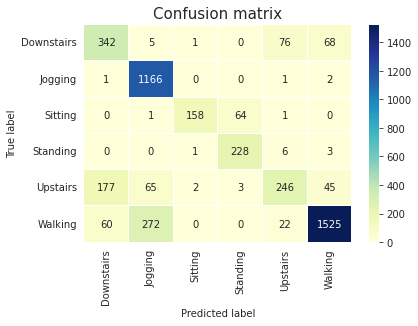

In [ ]:
labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(confusion_matrix_val, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
X_test_data_lr = scaler.transform(X_test)

y_test_pred = lr.predict(X_test_data_lr)
print('Accuracy:', accuracy_score(y_test, y_test_pred))
print('\n -------------Classification Report-------------\n')
print(classification_report(y_test, y_test_pred, digits=4))

Accuracy: 0.917813934084272

 -------------Classification Report-------------

              precision    recall  f1-score   support

  Downstairs     0.7956    0.9478    0.8651       230
     Jogging     0.9544    0.9082    0.9307       806
     Sitting     0.9780    0.9944    0.9861       179
    Standing     0.9512    0.9915    0.9710       118
    Upstairs     0.8089    0.8541    0.8309       233
     Walking     0.9391    0.9097    0.9242       831

    accuracy                         0.9178      2397
   macro avg     0.9046    0.9343    0.9180      2397
weighted avg     0.9213    0.9178    0.9186      2397



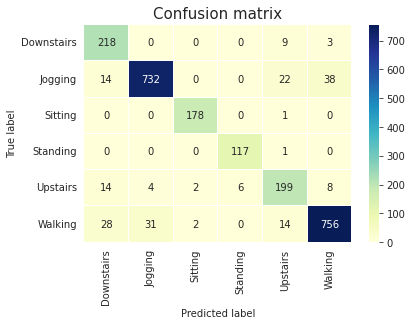

In [ ]:
labels = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
confusion_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title('Confusion matrix', fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()